In [1]:
run = "2023-02-23_18-13-41"
results_file = f"../logs/eval/runs/{run}/results.csv"

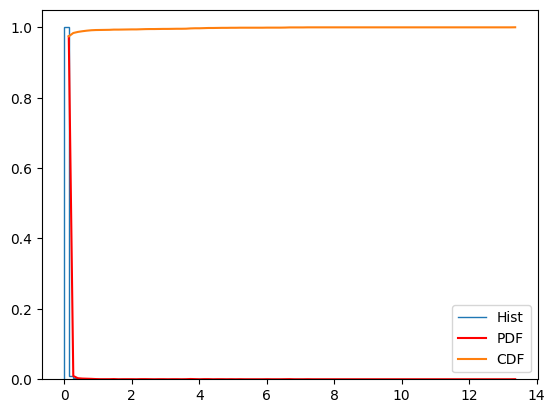

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

code = 4

#anomaly_df = pd.read_csv("/home/rudi/Projects/profile-based-anomaly-detection/data/dotlist_induced3/anomalies.csv")
#filtered_anomaly_df = anomaly_df[anomaly_df['CODE'] <= code]
#inverse_filtered_anomaly_df = anomaly_df[anomaly_df['CODE'] != code]
  
# reading losses from results
df = pd.read_csv(results_file)
losses = df['LOSS'].to_numpy()
  
# getting data of the histogram
count, bins_count = np.histogram(losses, bins=100)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.stairs(count / np.max(count), bins_count, label='Hist')
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()
plt.show()

In [3]:
df[(df['TRUE_CODE'] > 0) & (df['TRUE_CODE'] <= 4)]

,DS_INDEX,MESSAGE,LOSS,IS_DIFFERENT,TRUE_CODE


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'k',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'k',
 'xtick.bottom': False,
 'xtick.color': 'k',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'k',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
sns.set_context("notebook", rc={"font.size":10,
                                "axes.titlesize":14,
                                "axes.labelsize":10,
                                "xtick.labelsize": 9,
                                "ytick.labelsize": 9})

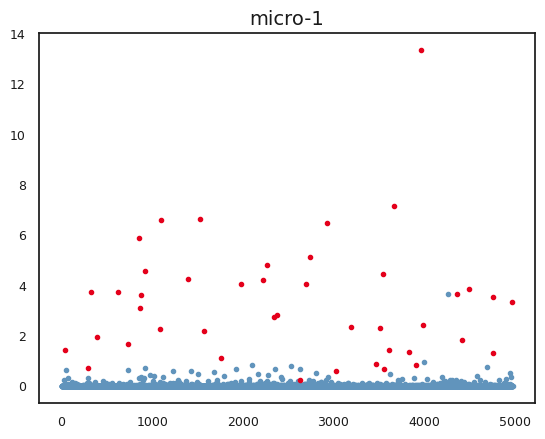

In [5]:
import matplotlib.pyplot as plt

std = np.std(losses)
mean = np.mean(losses)

t = mean + 1 * std

plt.scatter(df[~df['IS_DIFFERENT']]['DS_INDEX'], df[~df['IS_DIFFERENT']]['LOSS'], marker='.', c='#6194BC')
plt.scatter(df[df['IS_DIFFERENT']]['DS_INDEX'], df[df['IS_DIFFERENT']]['LOSS'], marker='.', c='#E4001B')
#plt.scatter(range(len(losses)), losses, marker='.')
#plt.scatter(range(len(losses)), losses, marker='.')
#plt.plot(range(len(losses)), np.full((len(losses)), t), color='red')
#plt.plot(range(len(losses)), np.full((len(losses)), mean), color='green')
plt.title('micro-1')
plt.show()

In [6]:
for i, sample in df[df['IS_DIFFERENT']].iterrows():
    #if sample['LOSS'] >= t:
    print(sample['DS_INDEX'], sample['MESSAGE'], sample['LOSS'])

36 20a89e97-28e3-491c-97e3-907c55429ef7.log.msg 1.4345303773880005
294 622283e3-de76-49db-b618-7a442d28600e.log.msg 0.7025877237319946
327 1c531223-311d-4b47-8145-c305d0b26dda.log.msg 3.729810953140259
396 22ffa286-4869-4d3e-b0e3-f6f3c1e00d65.log.msg 1.9380468130111692
622 55519a52-1fc2-47ef-8618-826c21028b5a.log.msg 3.751832962036133
728 d93c5895-6294-4edd-bcfa-a7b8bc4651c9.log.msg 1.6557856798171997
858 c3ddae46-a733-442d-8726-d6a324f34f0b.log.msg 5.8938398361206055
868 10fdcef7-7fc7-4a69-95b0-ba2bd0c226f8.log.msg 3.117344856262207
876 17cf525d-e806-4b61-b03d-e0400731aaa6.log.msg 3.617289066314697
922 c84c87d8-4cf9-43fa-82b7-c560a8e9b0ed.log.msg 4.561080455780029
1083 85cffa98-5496-4a98-b551-20b6fe7073a3.log.msg 2.251434087753296
1099 97341ac2-9cea-414f-b1e5-806102566f77.log.msg 6.585684299468994
1392 353799aa-f6bc-4f82-9fbc-6ab8c3a21d11.log.msg 4.273666858673096
1529 5fe88ec8-a85f-426a-8d0e-c671ab7c8756.log.msg 6.657097339630127
1574 8ee354b5-df03-48a0-8ceb-4251c9856cd3.log.msg 2.19

In [7]:
#df = df[(df['TRUE_CODE'] != 1) & (df['TRUE_CODE'] != 2) & (df['TRUE_CODE'] != 4)]

In [8]:
# _y_pred = df['IS_DIFFERENT'].tolist()
# y_true = []
# y_pred = []
# for i, pred in enumerate(_y_pred):
#     anomaly = (filtered_anomaly_df['CORRELATION_ID'] == i).any()
#     ignored = False #(inverse_filtered_anomaly_df['CORRELATION_ID'] == i).any() or overall
#     if not ignored:
#         y_true.append(anomaly)
#         y_pred.append(pred)

y_pred = df['IS_DIFFERENT'].tolist()
y_true = (df['TRUE_CODE'] > 0)

In [9]:
#filtered_anomaly_df.sort_values('CORRELATION_ID')

In [10]:
from sklearn.metrics import classification_report, fbeta_score

print(classification_report(y_true, y_pred))
print(fbeta_score(y_true, y_pred, beta=2))
print(fbeta_score(y_true, y_pred, beta=3))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4949
        True       0.63      0.90      0.74        30

    accuracy                           1.00      4979
   macro avg       0.81      0.95      0.87      4979
weighted avg       1.00      1.00      1.00      4979

0.8282208588957056
0.8626198083067093
